<a href="https://colab.research.google.com/github/ilyaShevchuk/PyData/blob/main/PrimatLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа № 1


Импорты

In [1]:
import numpy as np
import math
import csv
import pandas as pd
import matplotlib.pyplot as plt

**Метод Дихотомии**

In [2]:
def dichotomy_method(f, a, b, eps=1e-10):
    intervals_length = []
    delta = eps / 2
    interval_length = b - a
    function_calculations = 0
    intervals_length.append(interval_length)
    while interval_length > eps:
        x1 = (a + b - delta) / 2
        x2 = (a + b + delta) / 2
        if f(x1) > f(x2):
            a = x1
        else:
            b = x2
        interval_length = b - a
        function_calculations += 2
        intervals_length.append(interval_length)
    return (a + b) / 2.0, intervals_length, function_calculations

**Метод Золотого сечения**

In [3]:
def golden_section_method(f, a, b, eps=1e-10):
    intervals_length = []
    interval_length = b - a
    intervals_length.append(interval_length)
    x1 = a + (3 - math.sqrt(5)) / 2 * (b - a)
    x2 = a + (math.sqrt(5) - 1) / 2 * (b - a)
    fx1 = f(x1)
    fx2 = f(x2)
    function_calculations = 2
    while interval_length > eps:
        if fx1 > fx2:
            a = x1
            x1 = x2
            x2 = a + (math.sqrt(5) - 1) / 2 * (b - a)
            fx1 = fx2
            fx2 = f(x2)
            function_calculations += 1
        else:
            b = x2
            x2 = x1
            x1 = a + (3 - math.sqrt(5)) / 2 * (b - a)
            fx2 = fx1
            fx1 = f(x1)
            function_calculations += 1
        interval_length = b - a
        intervals_length.append(interval_length)
    return (a + b) / 2.0,  intervals_length, function_calculations


**Метод Парабол**

In [4]:
def parabolic_method(f, a, b, eps=1e-10):
    prev_x = a
    x1, x2, x3 = a, (a + b) / 2, b
    fx1, fx2, fx3 = f(x1), f(x2), f(x3)
    function_calculations = 3
    iterations = 0
    while True:
        iterations += 1
        if x3 == x1 or x2 == x1 or x3 == x2:
            return x2, function_calculations, iterations
        a0 = fx1
        a1 = (fx2 - fx1) / (x2 - x1)
        a2 = ((fx3 - fx1) / (x3 - x1) - (fx2 - fx1) / (x2 - x1)) / (x3 - x2)
        if a1 == a2:
            return x2, function_calculations, iterations
        x = (x1 + x2 - (a1 / a2)) / 2
        fx = f(x)
        function_calculations += 1
        if abs(x - prev_x) <= eps:
            return x, function_calculations, iterations
        if x < x2:
            if fx >= fx2:
                x1, fx1 = x, fx
            else:
                x3, fx3 = x2, fx2
                x2, fx2 = x, fx
        else:
            if fx >= fx2:
                x3, fx3 = x, fx
            else:
                x1, fx1 = x2, fx2
                x2, fx2 = x, fx
        prev_x = x

**Метод Фибоначчи**

In [5]:
def fibonacci_method(f, a, b, eps=1e-10):
    intervals_length = []
    function_calculations = 0
    intervals_length.append(b - a)
    n = 0
    fib1 = 1
    fib2 = 1
    while (fib1 + fib2) <= (b - a) / eps:
        n += 1
        tmp = fib1
        fib1, fib2 = fib2, fib2 + tmp

    x1 = a + (fib2 - fib1) / fib2 * (b - a)
    x2 = a + fib1 / fib2 * (b - a)
    f1, f2 = f(x1), f(x2)

    for i in range(0, n - 2):
        if f2 > f1:
            b, new_f = x2, f1
        else:
            a = x1
            x1 = x2
            new_f = f2
        if x1 - a < b - x1:
            x2 = b - (x1 - a)
            f1, f2 = new_f, f(x2)
        else:
            x2 = x1
            x1 = a + (b - x2)
            f2, f1 = new_f, f(x1)
        intervals_length.append(b - a)
        function_calculations += 1
    return (b + a) / 2, intervals_length, function_calculations


**Комбинированный метод Брента**

In [6]:
golden_section = (1 + math.sqrt(5)) / 2


def brent_method(f, a, c, eps=1e-10):
    x = v = w = (a + c) / 2
    x_res = w_res = v_res = f(x)
    function_calculations = 1
    d = e = c - a
    while True:
        g, u = e, None
        e = d
        if x != v and x != w and w != v and x_res != v_res and x_res != w_res and v_res != w_res:
            if w > c:
                a0 = v_res
                a1 = (x_res - v_res) / (x - v)
                a2 = ((w_res - v_res) / (w - v) - (x_res - v_res) / (x - v)) / (w - x)
                u = (v + x - (a1 / a2)) / 2
            else:
                a0 = w_res
                a1 = (x_res - w_res) / (x - w)
                a2 = ((v_res - w_res) / (v - w) - (x_res - w_res) / (x - w)) / (v - x)
                u = (w + x - (a1 / a2)) / 2
        if u is not None and u - a > eps and u < c - eps and abs(u - x) < g / 2:
            d = abs(u - x)
        else:
            if x < (c - a) / 2:
                u = x + (c - x) / golden_section
                d = c - x
            else:
                u = x - (x - a) / golden_section
                d = x - a
        if abs(u - x) < eps:
            return u, 0, function_calculations
        u_res = f(u)
        function_calculations += 1
        if u_res <= x_res:
            if u >= x:
                a = x
            else:
                c = x
            v, w, x = w, x, u
            v_res = w_res
            w_res = x_res
            x_res = u_res
        else:
            if u >= x:
                c = u
            else:
                a = u
            if u_res <= w_res or w == x:
                v, w = w, u
                v_res, w_res = w_res, u_res
            elif u_res <= v_res or v == x or v == w:
                v, v_res = u, u_res


Функции для тестов

In [7]:
def fun(x):
    return math.exp(math.sin(x)) * (x ** 2)
    
def fun2(x):
    return (x ** 2) - x - 1

columns=['Start segment', 'End segment', 'Epsilon', 'Minimum Point', 'Count of fun calls']

**Функция для тестирвания метода**

In [20]:
def method_test(method, f, file_name):
  for i in range(1):
    borders = np.random.uniform(i, i+1, size=(1, 2))
    for border in borders:
      start_segment = min(border[0], border[1])
      end_segment = max(border[0], border[1])
      for i in range(1, 15):
        eps = 1/10**i
        min_point, edges, count_calls = method(f, start_segment, end_segment, eps)
        data2= [start_segment, end_segment,eps, min_point, count_calls]
        df1 = pd.DataFrame([data2], columns=columns)
        df1.to_csv(file_name, mode='a', header=None, index=False)
  return edges

Тестирование *Метода Дихотомии*

In [22]:
df_test2 = pd.DataFrame(columns=columns)
df_test2.to_csv('test2.csv', index=False)
edges = method_test(dichotomy_method, fun, 'test2.csv')
a_test2 = pd.read_csv('test2.csv', index_col=False)
a_test2

,Start segment,End segment,Epsilon,Minimum Point,Count of fun calls
0,0.84976,0.962894,1.000000e-01,0.890543,2
1,0.84976,0.962894,1.000000e-02,0.853949,10
2,0.84976,0.962894,1.000000e-03,0.850230,16
3,0.84976,0.962894,1.000000e-04,0.849799,24
4,0.84976,0.962894,1.000000e-05,0.849764,30
5,0.84976,0.962894,1.000000e-06,0.849760,36
6,0.84976,0.962894,1.000000e-07,0.849760,44
7,0.84976,0.962894,1.000000e-08,0.849760,50
8,0.84976,0.962894,1.000000e-09,0.849760,56
9,0.84976,0.962894,1.000000e-10,0.849760,64


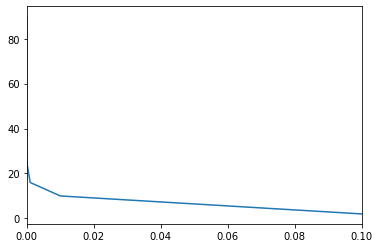

In [32]:
b_test2 = a_test2.sort_values(by='Epsilon')
plt.plot(b_test2['Epsilon'], b_test2['Count of fun calls'])
plt.xlim(1e-14, 1e-1)
plt.show()

Тестирование *Метода золотого сечения*

In [25]:
df = pd.DataFrame(columns=columns)
df.to_csv('test1.csv', index=False)
edges = method_test(golden_section_method, fun, 'test1.csv')
a = pd.read_csv('test1.csv', index_col=False)
print(edges)
a

[0.37126288602808033, 0.22945308232673212, 0.1418098037013482, 0.08764327862538385, 0.05416652507596437, 0.03347675354941945, 0.020689771526544914, 0.012786982022874538, 0.007902789503670349, 0.004884192519204189, 0.0030185969844661598, 0.0018655955347380293, 0.0011530014497281305, 0.0007125940850098988, 0.0004404073647182316, 0.0002721867202916395, 0.00016822064442659213, 0.00010396607586504736, 6.425456856154477e-05, 3.971150730350259e-05, 2.4543061258042176e-05, 1.5168446045460415e-05, 9.374615212609516e-06, 5.793830832850899e-06, 3.580784379758617e-06, 2.213046453092282e-06, 1.3677379266940903e-06, 8.453085263981919e-07, 5.224294002958985e-07, 3.228791261022934e-07, 1.9955027419360505e-07, 1.2332885190868836e-07, 7.622142228491668e-08, 4.710742962377168e-08, 2.911399263338943e-08, 1.799343699038225e-08, 1.112055564300718e-08, 6.8728813473750705e-09, 4.247674295632109e-09, 2.625207079498537e-09, 1.6224672161335718e-09, 1.0027398633649653e-09, 6.197273250130308e-10, 3.830125383519345

,Start segment,End segment,Epsilon,Minimum Point,Count of fun calls
0,0.195407,0.56667,1.000000e-01,0.239228,5
1,0.195407,0.56667,1.000000e-02,0.199358,10
2,0.195407,0.56667,1.000000e-03,0.195763,15
3,0.195407,0.56667,1.000000e-04,0.195439,20
4,0.195407,0.56667,1.000000e-05,0.195411,24
5,0.195407,0.56667,1.000000e-06,0.195407,29
6,0.195407,0.56667,1.000000e-07,0.195407,34
7,0.195407,0.56667,1.000000e-08,0.195407,39
8,0.195407,0.56667,1.000000e-09,0.195407,44
9,0.195407,0.56667,1.000000e-10,0.195407,48


График

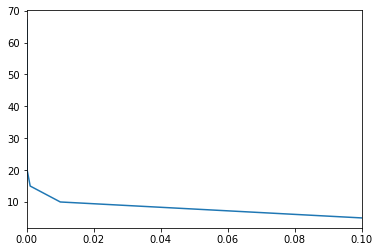

In [33]:
b = a.sort_values(by='Epsilon')
plt.plot(b['Epsilon'], b['Count of fun calls'])
plt.xlim(1e-14, 1e-1)
plt.show()

Тестирование *Метода Фибоначчи*

In [27]:
df_test3 = pd.DataFrame(columns=columns)
df_test3.to_csv('test3.csv', index=False)
edges = method_test(fibonacci_method, fun, 'test3.csv')
a_test3 = pd.read_csv('test3.csv', index_col=False)
a_test3

,Start segment,End segment,Epsilon,Minimum Point,Count of fun calls
0,0.110169,0.314481,1.000000e-01,0.212325,0
1,0.110169,0.314481,1.000000e-02,0.133744,3
2,0.110169,0.314481,1.000000e-03,0.112297,8
3,0.110169,0.314481,1.000000e-04,0.110361,13
4,0.110169,0.314481,1.000000e-05,0.110186,18
5,0.110169,0.314481,1.000000e-06,0.110171,23
6,0.110169,0.314481,1.000000e-07,0.110169,27
7,0.110169,0.314481,1.000000e-08,0.110169,32
8,0.110169,0.314481,1.000000e-09,0.110169,37
9,0.110169,0.314481,1.000000e-10,0.110169,42


График

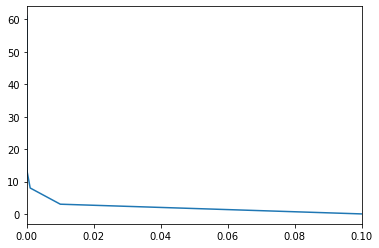

In [31]:
b_test3 = a_test3.sort_values(by='Epsilon')
plt.plot(b_test3['Epsilon'], b_test3['Count of fun calls'])
plt.xlim(1e-14, 1e-1)
plt.show()

Тестирование *Метода парабол*

In [34]:
df = pd.DataFrame(columns=columns)
df.to_csv('test4.csv', index=False)
method_test(parabolic_method, fun, 'test4.csv')
a_test4 = pd.read_csv('test4.csv', index_col=False)
a_test4.head()

,Start segment,End segment,Epsilon,Minimum Point,Count of fun calls
0,0.117686,0.660425,0.10000,0.106036,1
1,0.117686,0.660425,0.01000,0.002587,4
2,0.117686,0.660425,0.00100,0.000180,6
3,0.117686,0.660425,0.00010,0.000012,8
4,0.117686,0.660425,0.00001,0.000003,9


График

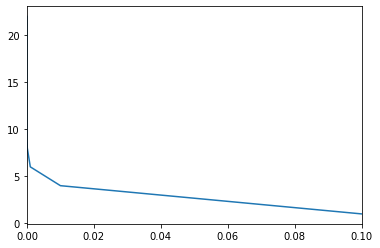

In [35]:
b_test4 = a_test4.sort_values(by='Epsilon')
plt.plot(b_test4['Epsilon'], b_test4['Count of fun calls'])
plt.xlim(1e-14, 1e-1)
plt.show()

Тестирование *Метода Брента*

In [36]:
df = pd.DataFrame(columns=columns)
df.to_csv('test5.csv', index=False)
edges = method_test(brent_method, fun, 'test5.csv')
a_test5 = pd.read_csv('test5.csv', index_col=False)
a_test5.head()

,Start segment,End segment,Epsilon,Minimum Point,Count of fun calls
0,0.112669,0.833621,0.10000,0.165262,2
1,0.112669,0.833621,0.01000,0.115600,5
2,0.112669,0.833621,0.00100,0.113097,7
3,0.112669,0.833621,0.00010,0.112693,10
4,0.112669,0.833621,0.00001,0.112673,12


График

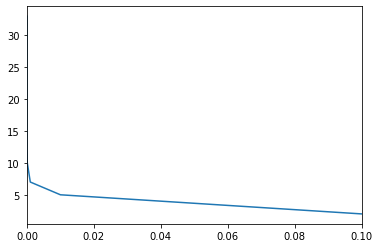

In [37]:
b_test5 = a_test5.sort_values(by='Epsilon')
plt.plot(b_test5['Epsilon'], b_test5['Count of fun calls'])
plt.xlim(1e-14, 1e-1)
plt.show()